# Visualization With Seaborn
Seaborn is a Python data visualization library based on matplotlib.
It provides a high-level interface for drawing attractive and informative statistical graphics. It provide choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.
The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

## Seaborn

## Table of Contents

1. Creating basic plots
         - Line Chart
         - Bar Chart
         - Histogram
         - Box plot
         - Violin plot
         - Scatter plot
         - Hue semantic
         - Bubble plot
2. Advance Categorical plots in Seaborn
3. Density plots
4. Pair plots

In [1]:
# importing required libraries
import seaborn as sns
sns.set()
sns.set(style="darkgrid")


import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

# LOADING DATA SET

In [2]:
# read the dataset
martdata2 = pd.read_csv('bigmart_data.csv')
# drop the null values
martdata2 = martdata2.dropna(how="any")
# multiply Item_Visibility by 100 to increase size
martdata2["Visibility_Scaled"] = martdata2["Item_Visibility"] * 100
# view the top results
martdata2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility_Scaled
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.604730
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.927822
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.676007
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0.000000


# 1. Creating basic plots
 Let's have a look on how can you create some basic plots in seaborn in a single
line for which multiple lines were required in matplotlib.

Line Chart
With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable.
In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line":

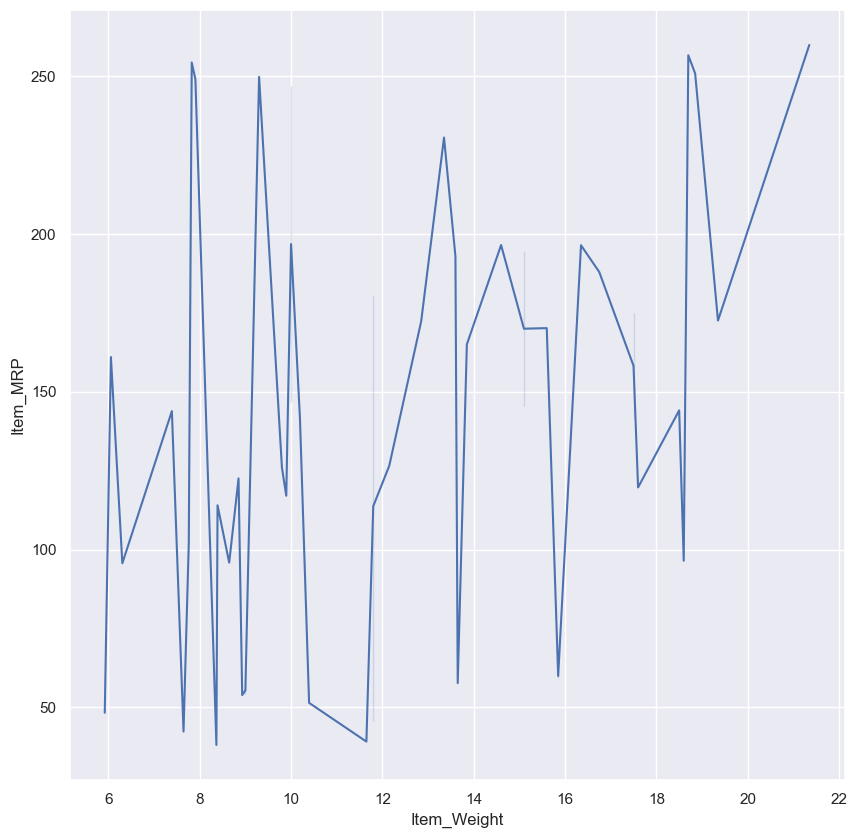

In [3]:
# line plot using relplot
sns.lineplot(x="Item_Weight", y="Item_MRP",data=martdata2[:50]);

# Bar Chart
In seaborn, you can create a barchart by simply using the barplot function.
Notice that to achieve the same thing in matplotlib, we had to write extra code just to group the data category wise.
And then we had to write much more code to make sure that the plot comes out correct.

<AxesSubplot:xlabel='Item_Type', ylabel='Item_MRP'>

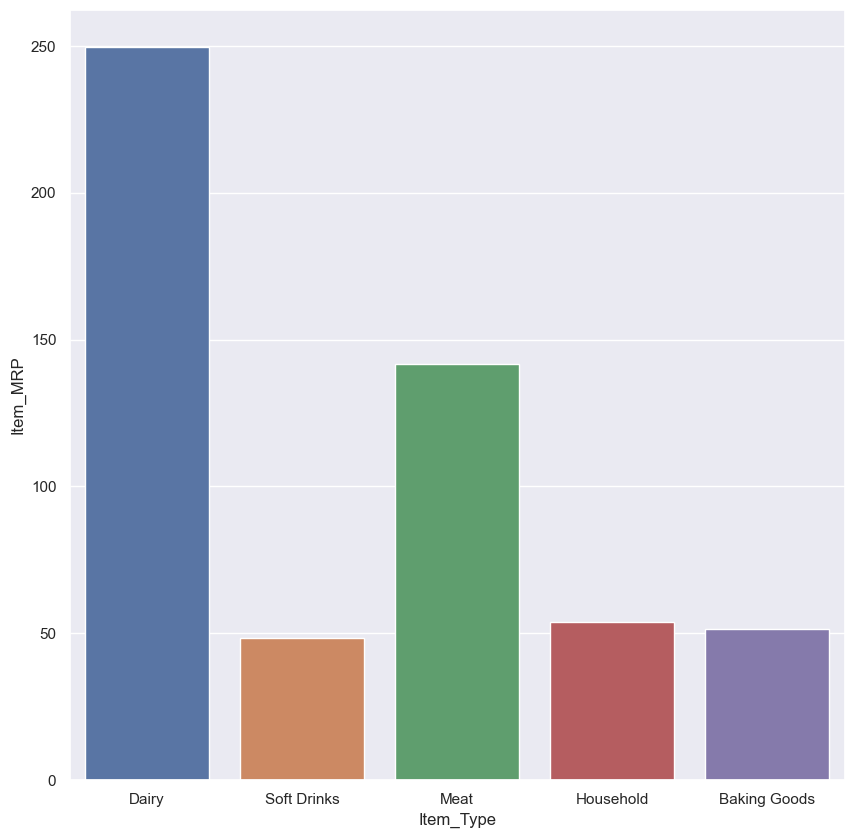

In [4]:
sns.barplot(x="Item_Type", y="Item_MRP", data=martdata2[:5])

# Histogram¶
You can create a histogram in seaborn by simply using the distplot(). There are multiple options that we can use which we will see further in the notebook.

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

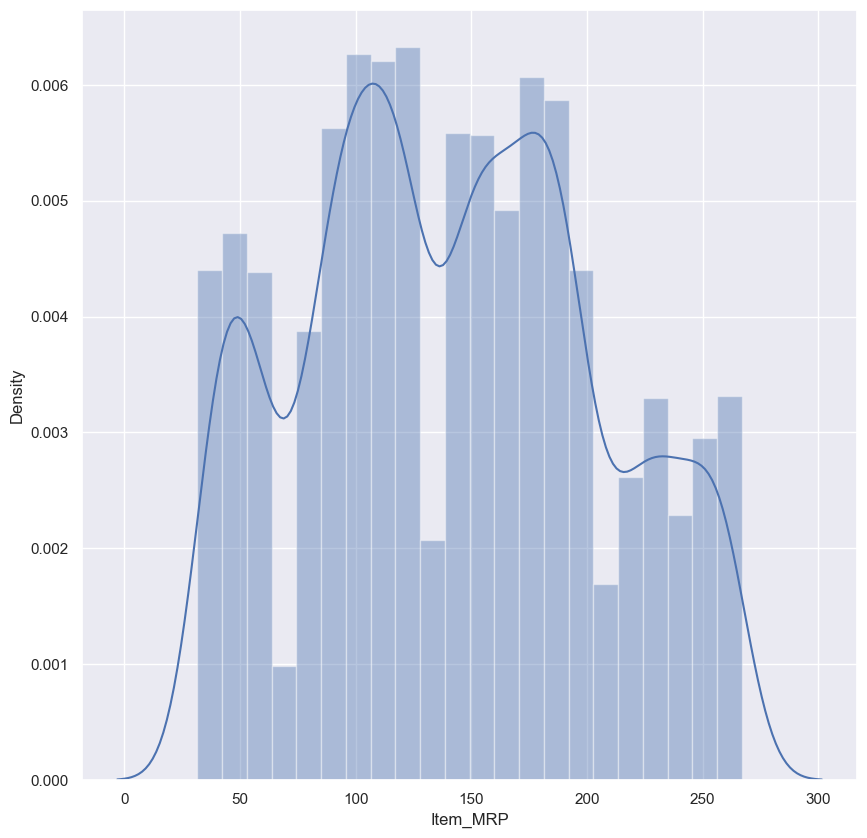

In [5]:
sns.distplot(martdata2['Item_MRP'])

# Box plots¶
You can use the boxplot() for creating boxplots in seaborn.
Let's try to visualize the distribution of Item_Outlet_Sales of items.

<AxesSubplot:xlabel='Item_Outlet_Sales'>

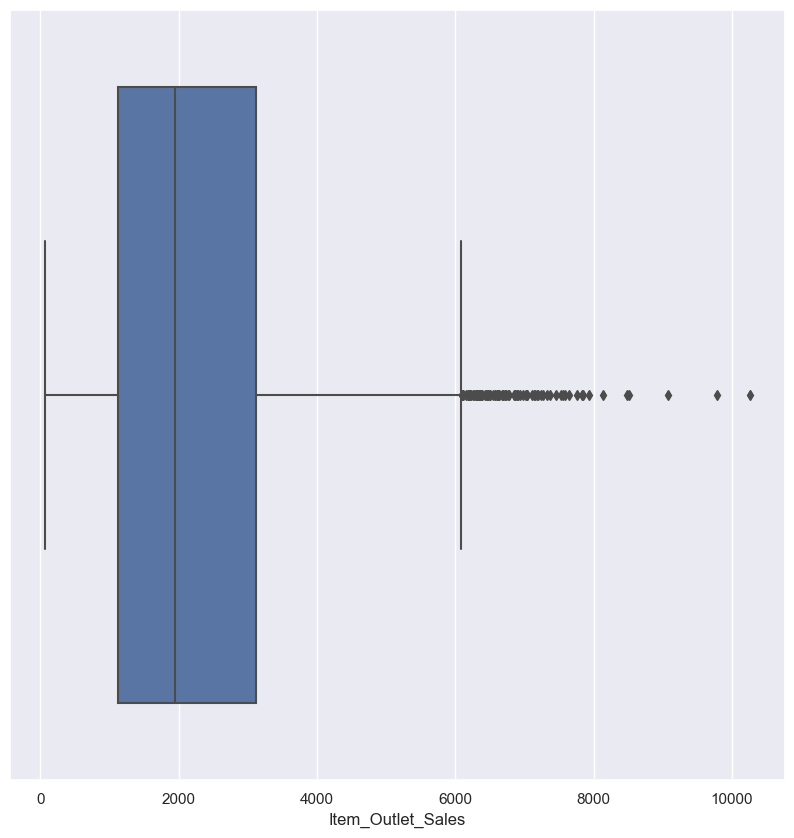

In [6]:
sns.boxplot(martdata2['Item_Outlet_Sales'], orient='vertical')

# Violin plot
A violin plot plays a similar role as a box and whisker plot.
It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.
Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.
You can create a violinplot using the violinplot() in seaborn.

<AxesSubplot:xlabel='Item_Outlet_Sales'>

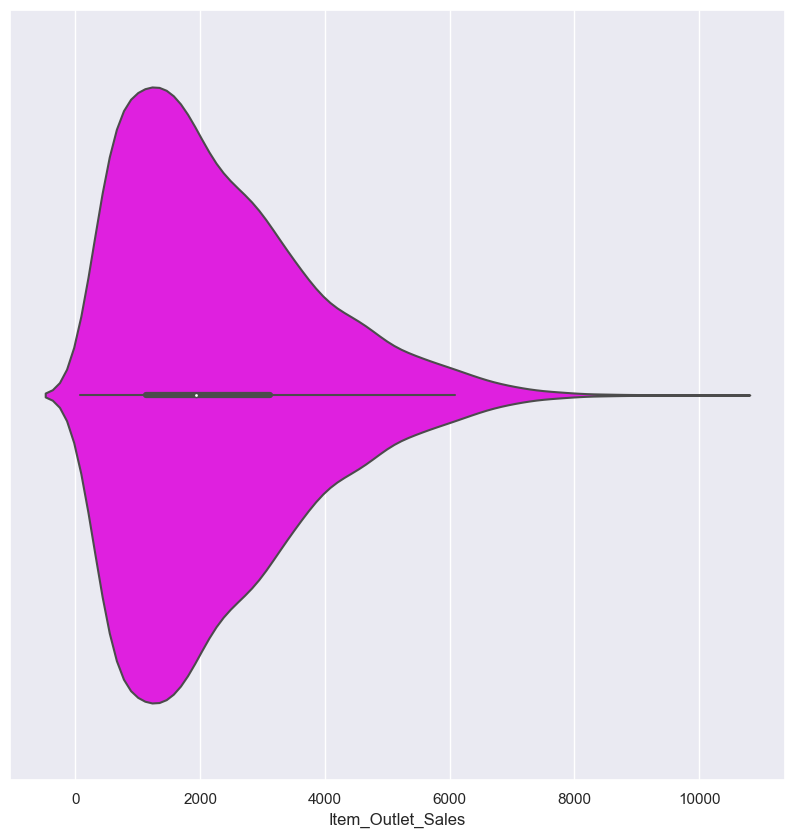

In [7]:
sns.violinplot(martdata2['Item_Outlet_Sales'], orient='vertical', color='magenta')

#  Density Plots
Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with sns.kdeplot:

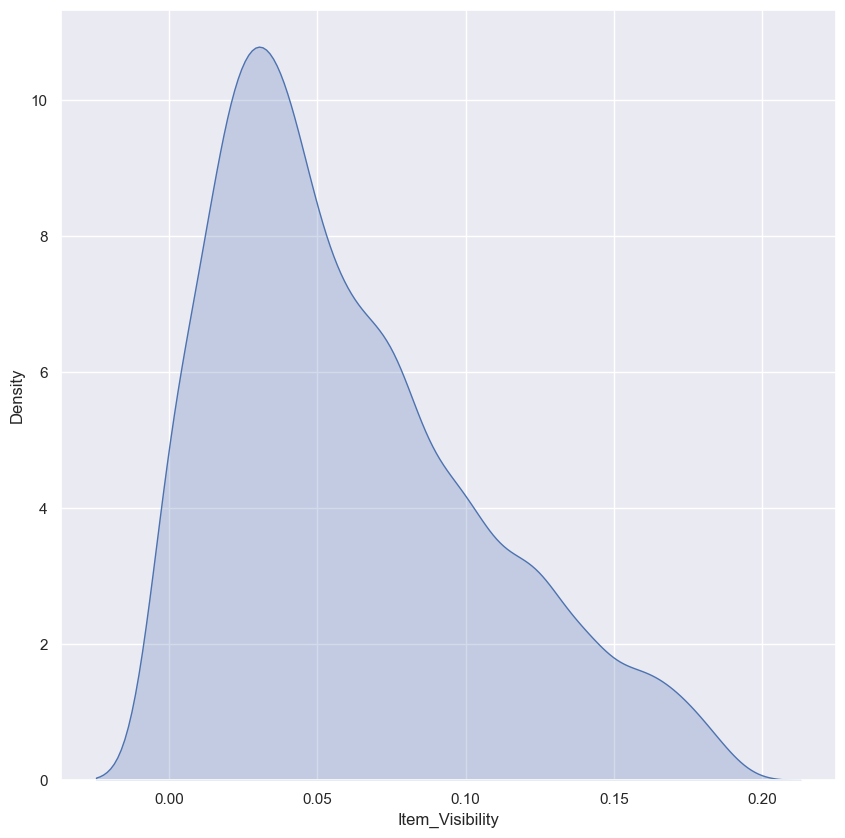

In [8]:
# distribution of Item Visibility
plt.figure(figsize=(10,10))
sns.kdeplot(martdata2['Item_Visibility'], shade=True);

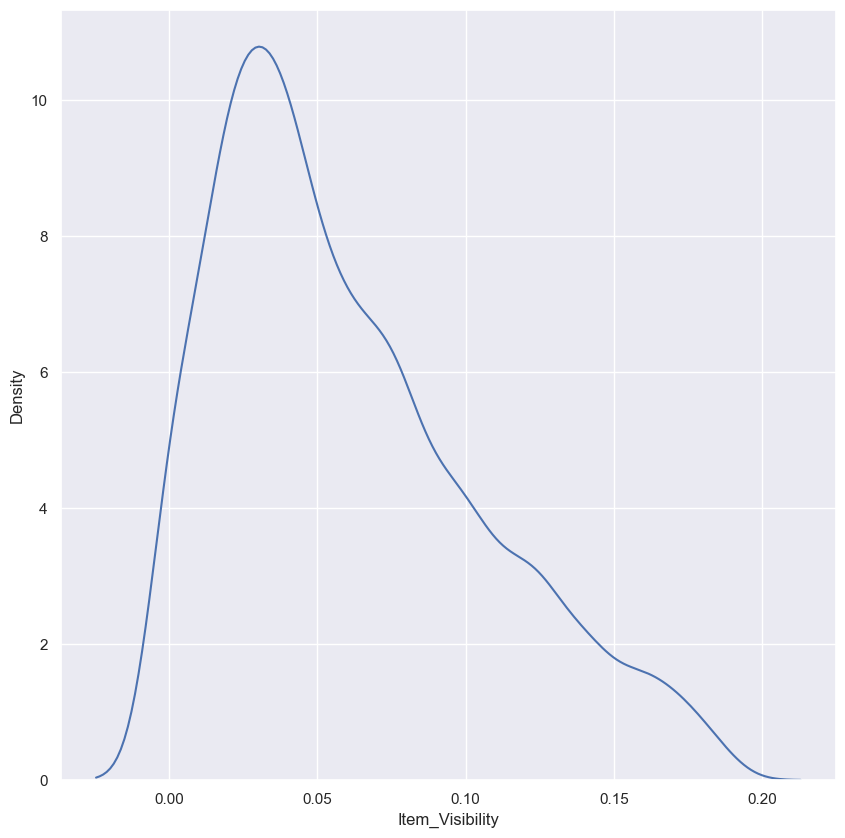

In [9]:
# distribution of Item Visibility
plt.figure(figsize=(10,10))
sns.kdeplot(martdata2['Item_Visibility'], shade=False);

# Combination of Histogram and Density on the same Plot
Histograms and KDE can be combined using distplot:

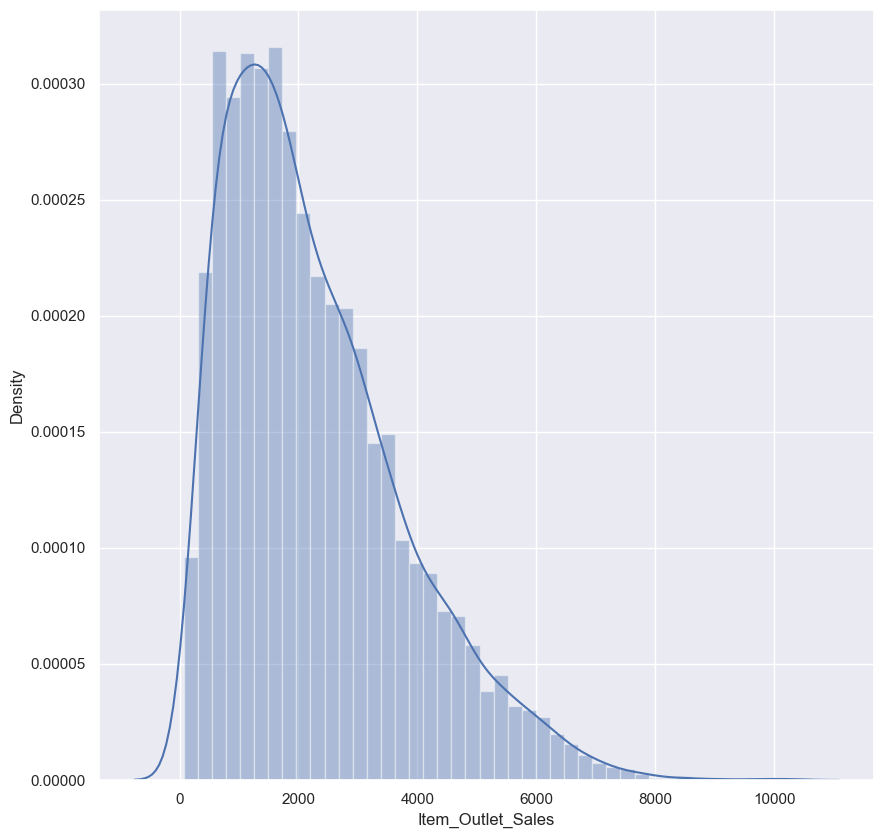

In [11]:
plt.figure(figsize=(10,10))
sns.distplot(martdata2['Item_Outlet_Sales']);

# Pair plots
When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


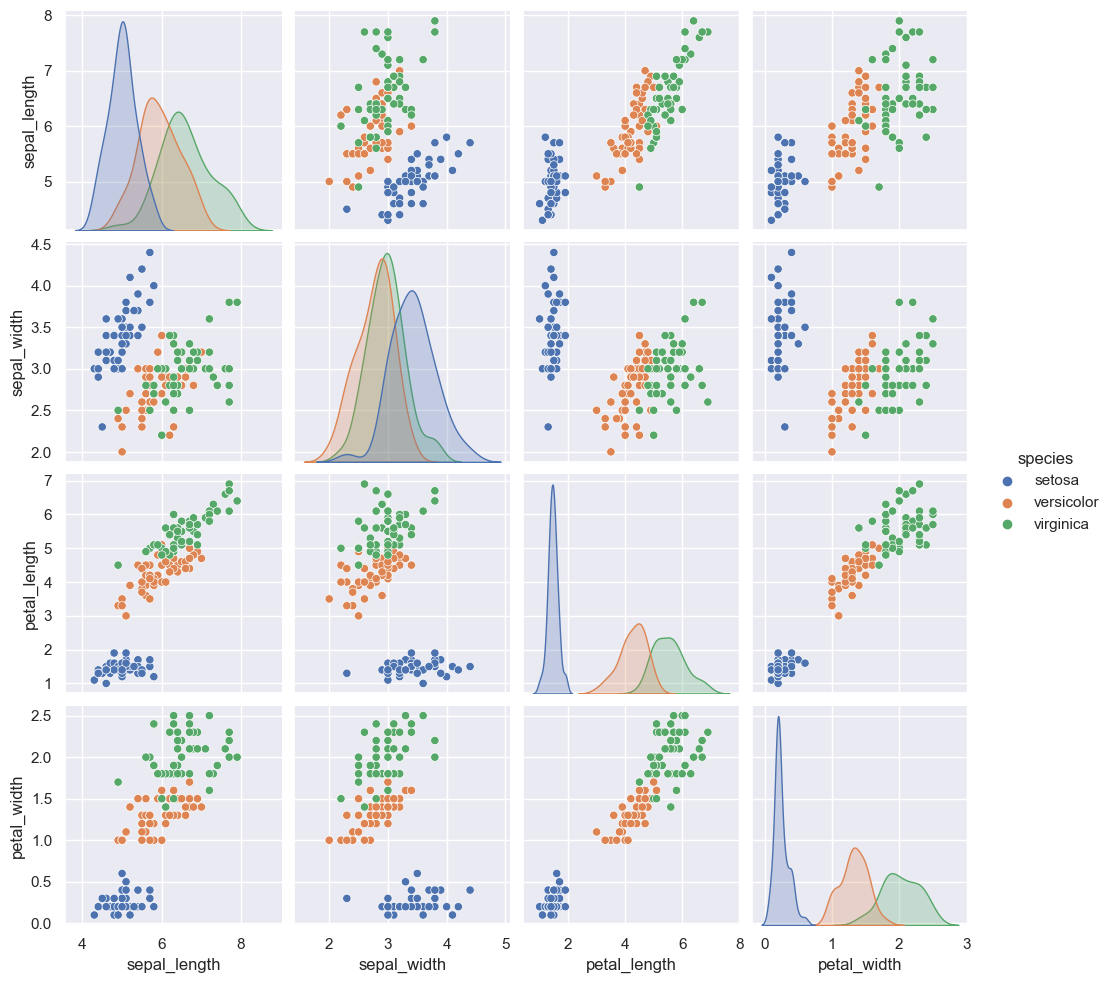

In [13]:
sns.pairplot(iris, hue='species', height=2.5);